## 1. Load the Data

### Import Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

### Load the Dataset

In [2]:
df = pd.read_excel('Online Retail.xlsx')

## 2. Data Preprocessing

### Inspect the Data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


### Remove Null Values in the Dataset

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
df.dropna(subset=['CustomerID'], inplace=True)

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Remove Negative and Zero Values in Quantity and UnitPrice

In [9]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


In [10]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [11]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


### Convert CustomerID to an Integer

In [12]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [13]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

## 3. Calculate RFM Metrics

In [14]:
# Set a reference date as the most recent data in the dataset
reference_date = df['InvoiceDate'].max() + pd.DateOffset(days=1)

# Create TotalSpend column
df['TotalSpend'] = df['Quantity'] * df['UnitPrice']

# Create RFM DataFrame
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days, # Recency
    'InvoiceNo': 'nunique', # Frequency
    'TotalSpend': 'sum' # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalSpend': 'Monetary'
})

In [15]:
rfm.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,2,7,4310.00
12348,75,4,1797.24
12349,19,1,1757.55
12350,310,1,334.40


## 4. Binning for RFM Scores

In [16]:
rfm.describe()

,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000
mean,92.536422,4.272015,2054.266460
std,100.014169,7.697998,8989.230441
min,1.000000,1.000000,3.750000
25%,18.000000,1.000000,307.415000
50%,51.000000,2.000000,674.485000
75%,142.000000,5.000000,1661.740000
max,374.000000,209.000000,280206.020000


In [17]:
recency_bins = [0, 20, 50, 150, 250, 400]
frequency_bins = [0, 2, 3, 10, 50, 250]
monetary_bins = [0, 300, 700, 2000, 5000, 280210]

rfm['R_Score'] = pd.cut(rfm['Recency'], bins=recency_bins, labels=[5, 4, 3, 2, 1], right=False).astype(int)
rfm['F_Score'] = pd.cut(rfm['Frequency'], bins=frequency_bins, labels=[1, 2, 3, 4, 5], right=False).astype(int)
rfm['M_Score'] = pd.cut(rfm['Monetary'], bins=monetary_bins, labels=[1, 2, 3, 4, 5], right=False).astype(int)

In [18]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,5
12347,2,7,4310.00,5,3,4
12348,75,4,1797.24,3,3,3
12349,19,1,1757.55,5,1,3
12350,310,1,334.40,1,1,2


## 5. K-Means Clustering

### Elbow Method

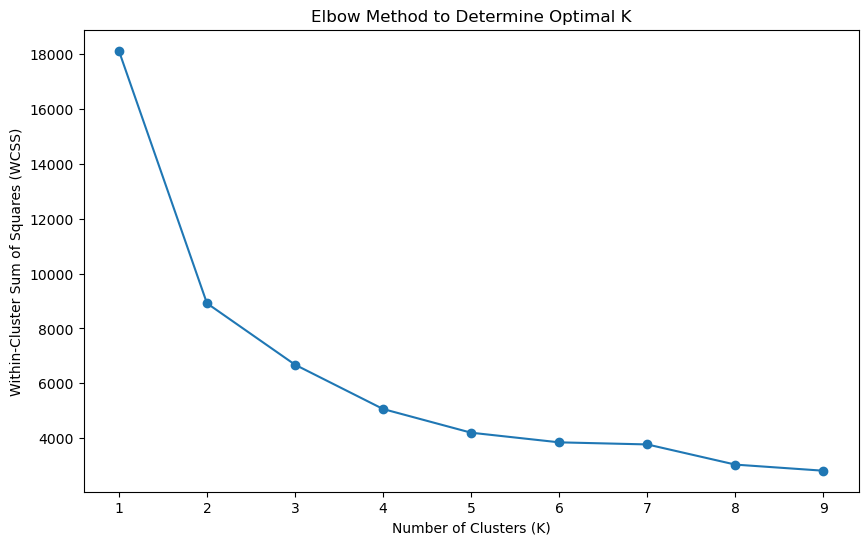

In [19]:
rfm_kmeans = rfm[['R_Score', 'F_Score', 'M_Score']]

wcss = []
K_range = range(1, 10) 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_kmeans)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.savefig('Elbow-Method.png', transparent=True)
plt.show()

### Fit the K-Means Model

In [20]:
# Choose the optimal K based on the Elbow Method graph
optimal_k = 3

# Apply k_means clustering with optimal_k as n_clusters
kmeans = KMeans(n_clusters=optimal_k, random_state = 42)
rfm['Cluster'] = kmeans.fit_predict(rfm_kmeans)

In [21]:
rfm.head(15)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Cluster
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,1
12347,2,7,4310.00,5,3,4,2
12348,75,4,1797.24,3,3,3,2
12349,19,1,1757.55,5,1,3,0
12350,310,1,334.40,1,1,2,1
12352,36,8,2506.04,4,3,4,2
12353,204,1,89.00,2,1,1,1
12354,232,1,1079.40,2,1,3,1
12355,214,1,459.40,2,1,2,1


### Visualize the Clusters

In [22]:
summary = rfm.groupby('Cluster').agg({
    'R_Score': 'mean',
    'F_Score': 'mean',
    'M_Score': 'mean',
}).reset_index()

In [23]:
print(summary)

   Cluster   R_Score   F_Score   M_Score
0        0  4.441527  1.779236  1.795943
1        1  2.164294  1.484118  1.780394
2        2  4.244922  3.225209  3.688172


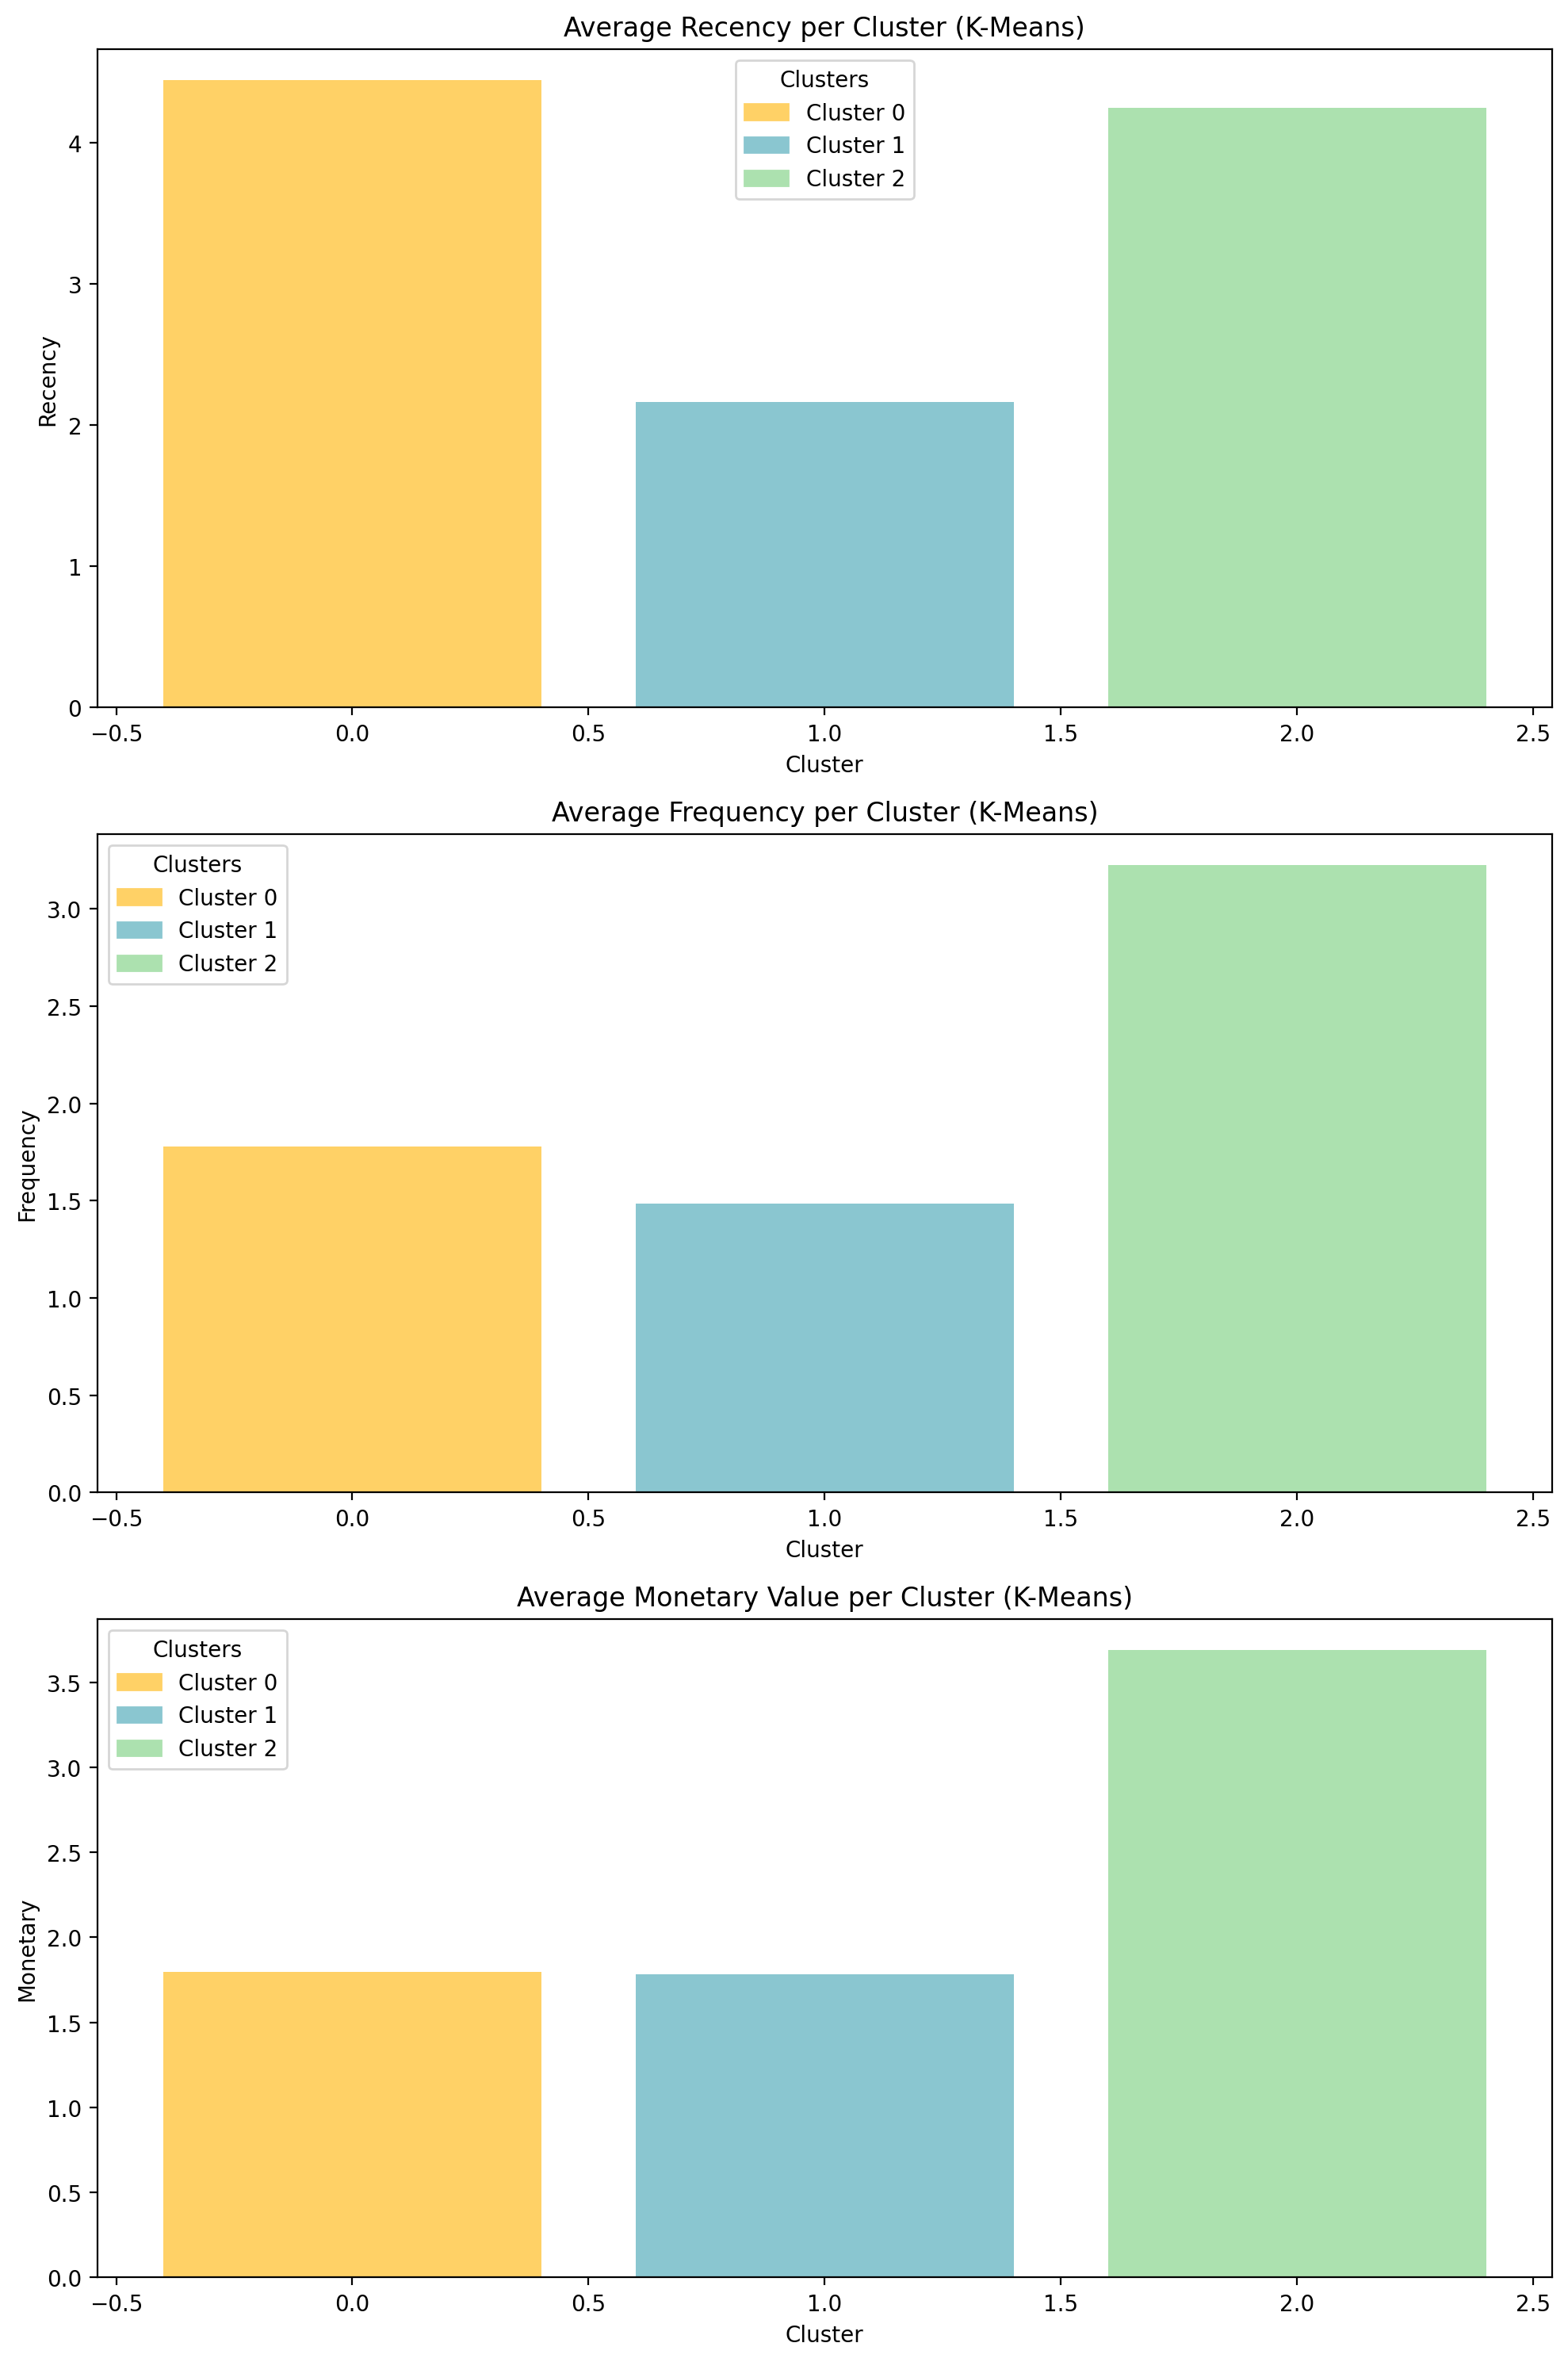

In [24]:
colors = ['#FFD166', '#8AC6D0', '#ACE1AF']

fig, axes = plt.subplots(3, 1, figsize=(10, 15), dpi=200)
legend_patches = [mpatches.Patch(color=colors[i], label=f'Cluster {i}') for i in summary.index]

axes[0].bar(summary.index, summary['R_Score'], color=colors)
axes[0].set_title('Average Recency per Cluster (K-Means)')
axes[0].set_xlabel('Cluster')
axes[0].set_ylabel('Recency')
axes[0].legend(handles=legend_patches, title='Clusters')

axes[1].bar(summary.index, summary['F_Score'], color=colors)
axes[1].set_title('Average Frequency per Cluster (K-Means)')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Frequency')
axes[1].legend(handles=legend_patches, title='Clusters')

axes[2].bar(summary.index, summary['M_Score'], color=colors)
axes[2].set_title('Average Monetary Value per Cluster (K-Means)')
axes[2].set_xlabel('Cluster')
axes[2].set_ylabel('Monetary')
axes[2].legend(handles=legend_patches, title='Clusters')

plt.tight_layout()
plt.savefig('rfm_summary.png', transparent=True)
plt.show()

In [25]:
print(rfm['Cluster'].value_counts())

Cluster
1    1826
2    1674
0     838
Name: count, dtype: int64


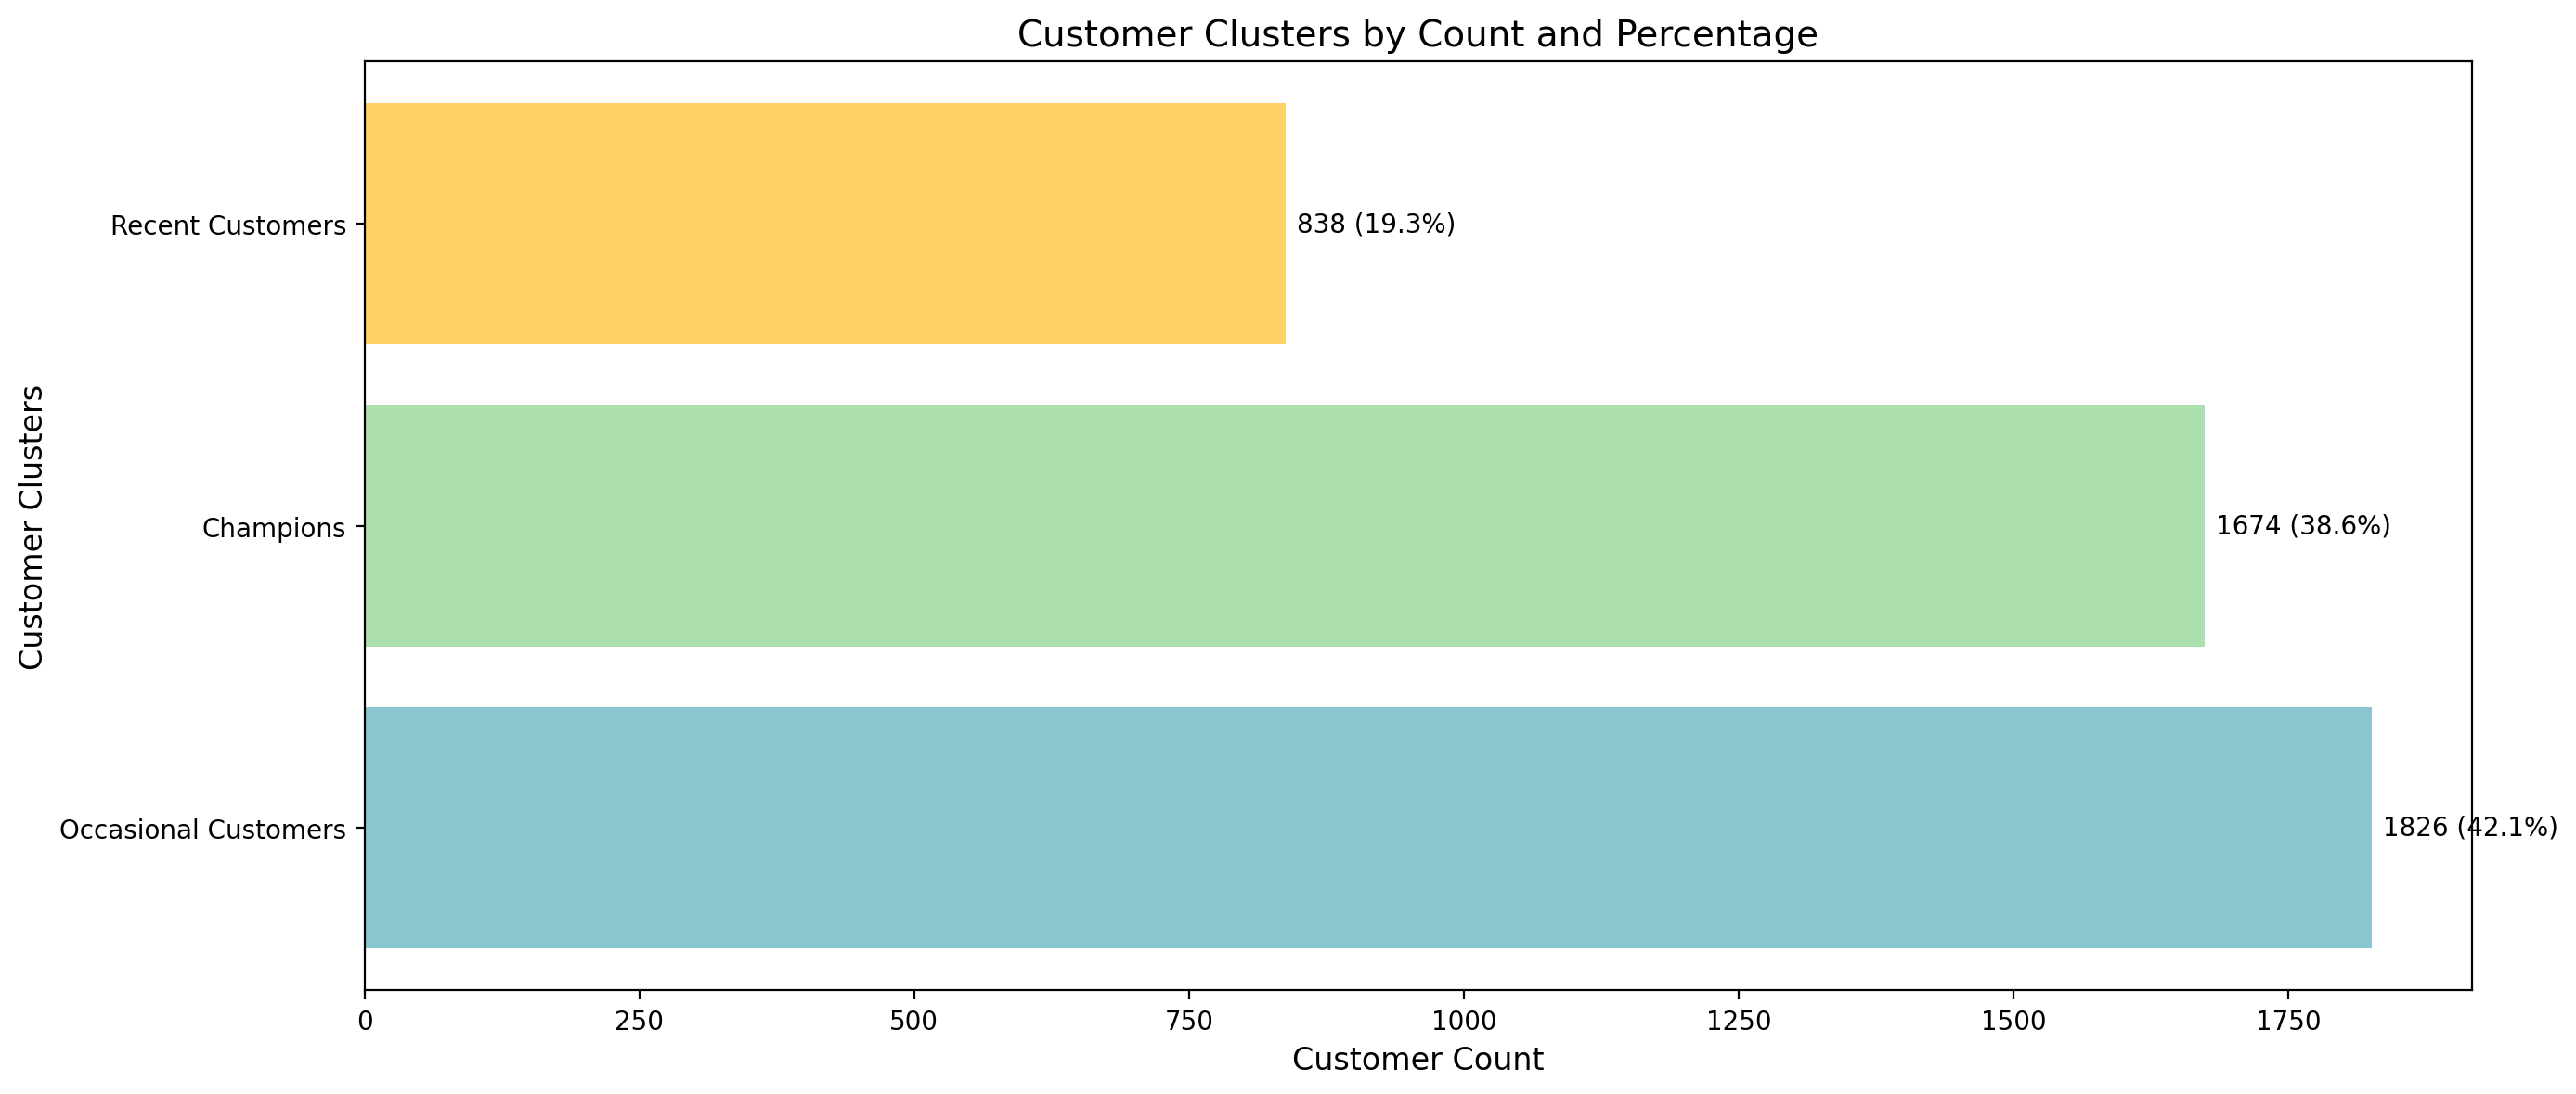

In [26]:
# Count the number of customers in each cluster
cluster_counts = rfm['Cluster'].value_counts()

# Map the cluster to the desired names
cluster_names = {0:"Recent Customers", 1:"Occasional Customers", 2:"Champions"}
cluster_counts.index = cluster_counts.index.map(cluster_names)

# Calculate the percentage of customers in each cluster
total_customers = cluster_counts.sum()
percentage_customers = (cluster_counts / total_customers) * 100

# Create a horizontal bar chart
plt.figure(figsize=(14, 6), dpi=200)

# Define the custom color list correct matching
colors = {
    'Recent Customers': '#FFD166', 
    'Occasional Customers':'#8AC6D0', 
    'Champions':'#ACE1AF'
}

# Map the color to each cluster based on it's name
bar_colors = [colors[cluster_name] for cluster_name in cluster_counts.index]

# Plot the horizontal bar chart
plt.barh(cluster_counts.index, cluster_counts, color=bar_colors)

# Set the title and labels
plt.title('Customer Clusters by Count and Percentage', fontsize=14)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('Customer Clusters', fontsize=12)

# Show the percentage and count values on the bars
for index, (count, percentage) in enumerate(zip(cluster_counts, percentage_customers)):
    plt.text(count + 10, index, f'{count} ({percentage:.1f}%)', va='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.savefig('customer-clusters.png', transparent=True)
plt.show()

## 6. Rule-Based Segmentation

### Drop the 'Cluster' column

In [27]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Cluster
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,1
12347,2,7,4310.00,5,3,4,2
12348,75,4,1797.24,3,3,3,2
12349,19,1,1757.55,5,1,3,0
12350,310,1,334.40,1,1,2,1


In [28]:
rfm = rfm.drop('Cluster', axis=1)

In [29]:
rfm.head()

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346,326,1,77183.60,1,1,5
12347,2,7,4310.00,5,3,4
12348,75,4,1797.24,3,3,3
12349,19,1,1757.55,5,1,3
12350,310,1,334.40,1,1,2


### Create the Segments

In [30]:
def rfm_segmentation(row):
    if row['R_Score'] == 5 and row['F_Score'] == 5 and row['M_Score'] == 5:
        return 'Elites'
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Champions'  
    elif row['R_Score'] >= 4 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return 'Regular Customers'
    elif row['R_Score'] <= 3 and row['F_Score'] <= 3 and row['M_Score'] >= 4:
        return 'Occasional High Spenders'
    elif row['R_Score'] <= 3 and row['F_Score'] <= 3 and row['M_Score'] <= 3:
        return 'Occasional Customers'
    elif row['R_Score'] >= 4 and row['F_Score'] >= 1 and row['M_Score'] >= 1:
        return 'Recent Customers'
    elif row['R_Score'] >= 1 and row['F_Score'] >= 1 and row['M_Score'] >= 1:
        return 'At-Risk Customers'
    else:
        return 'Others'

# Apply segmentation to the RFM data
rfm['Segment'] = rfm.apply(rfm_segmentation, axis=1)

In [31]:
print(rfm['Segment'].value_counts())

Segment
Occasional Customers        1801
Loyal Customers              915
Recent Customers             854
Regular Customers            360
Champions                    340
Occasional High Spenders      49
Elites                        15
At-Risk Customers              4
Name: count, dtype: int64


In [32]:
rfm.head(10)

,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,Segment
CustomerID,,,,,,,
12346,326,1,77183.60,1,1,5,Occasional High Spenders
12347,2,7,4310.00,5,3,4,Loyal Customers
12348,75,4,1797.24,3,3,3,Regular Customers
12349,19,1,1757.55,5,1,3,Recent Customers
12350,310,1,334.40,1,1,2,Occasional Customers
12352,36,8,2506.04,4,3,4,Loyal Customers
12353,204,1,89.00,2,1,1,Occasional Customers
12354,232,1,1079.40,2,1,3,Occasional Customers
12355,214,1,459.40,2,1,2,Occasional Customers


### Visualize the Segments

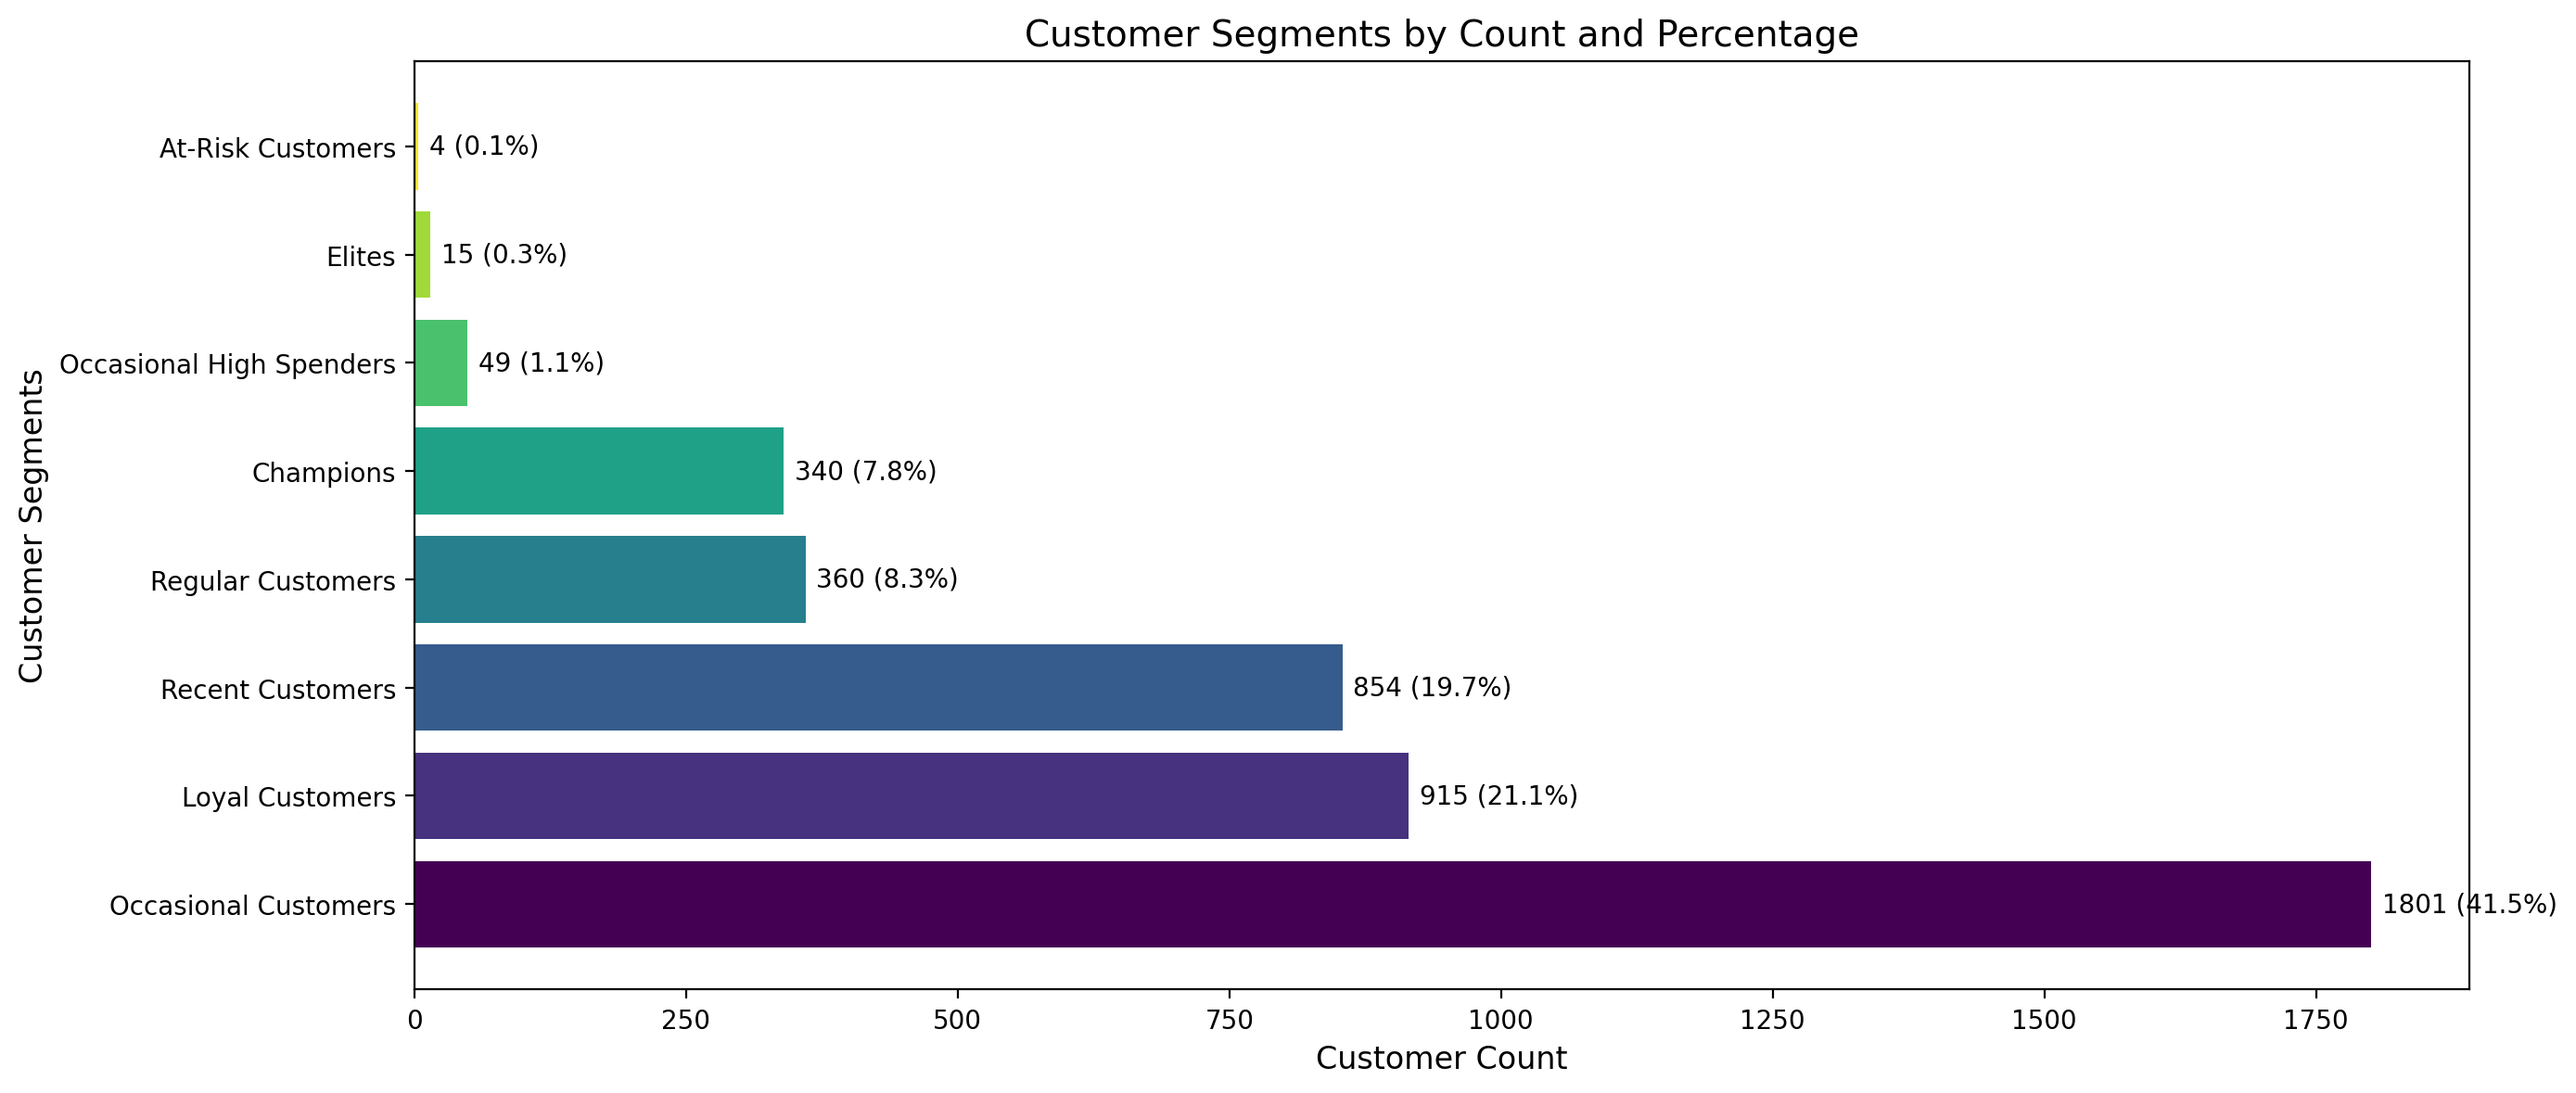

In [33]:
# Count the number of customers in each segment
segment_counts = rfm['Segment'].value_counts()

# Calculate the percentage of customers in each segment
total_customers = segment_counts.sum()
percentage_customers = (segment_counts / total_customers) * 100

# Create a horizontal bar chart with different colors
plt.figure(figsize=(14, 6), dpi=200)
colors = plt.cm.viridis(np.linspace(0, 1, len(segment_counts)))

# Plot the horizontal bar chart
plt.barh(segment_counts.index, segment_counts, color=colors)

# Set the title and labels
plt.title('Customer Segments by Count and Percentage', fontsize=14)
plt.xlabel('Customer Count', fontsize=12)
plt.ylabel('Customer Segments', fontsize=12)

# Show the percentage and count values on the bars
for index, (count, percentage) in enumerate(zip(segment_counts, percentage_customers)):
    plt.text(count + 10, index, f'{count} ({percentage:.1f}%)', va='center', fontsize=10, color='black')

# Show the plot
plt.tight_layout()
plt.savefig("segments-rule-based.png", transparent=True)
plt.show()